# Array Configuration Generation
This notebook generates and visualizes various antenna array configurations for FASR using `fasr_solar_simul` (fss).

In [42]:
import fasr_solar_simul as fss
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
import os

# Speed of light in m/s
C_LIGHT = c
import matplotlib
%matplotlib inline

## Airy Pattern

'airy_model' completed at 2026-01-22 17:23:56; runtime: 0.00 seconds
2 GHz: first local minimum at uv distance = 16.32 m, amplitude = 2.4108e-03
Nyquist frequency: 2 GHz: 1.23 samples per 10 meters
'airy_model' completed at 2026-01-22 17:23:56; runtime: 0.00 seconds
4 GHz: first local minimum at uv distance = 9.01 m, amplitude = 7.6733e-03
Nyquist frequency: 4 GHz: 2.22 samples per 10 meters
'airy_model' completed at 2026-01-22 17:23:56; runtime: 0.00 seconds
10 GHz: first local minimum at uv distance = 3.80 m, amplitude = 9.7896e-03
Nyquist frequency: 10 GHz: 5.26 samples per 10 meters
'airy_model' completed at 2026-01-22 17:23:56; runtime: 0.00 seconds
20 GHz: first local minimum at uv distance = 2.00 m, amplitude = 3.6169e-02
Nyquist frequency: 20 GHz: 9.99 samples per 10 meters


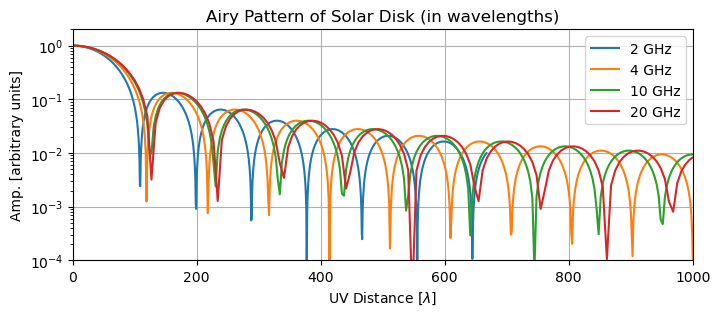

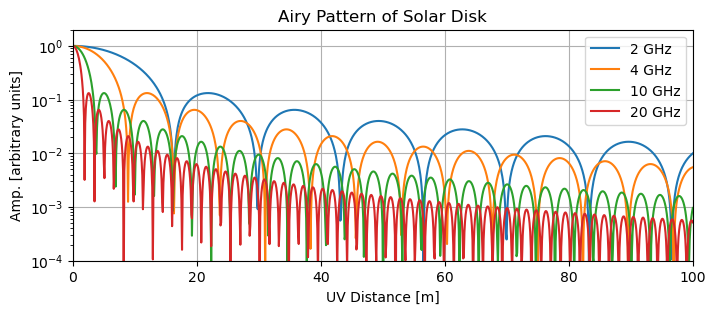

In [2]:
# Fitted parameters for disk_size_function
c1 = 4.08532216e+02
alpha1 = 1.25993061e+00
c2 = 9.91633278e+02
alpha2 = 4.59227095e-03

# Frequencies in GHz to test
frequencies = [2, 4, 10, 20]

# Range of uv distances in meters
uv_meters = np.linspace(0, 100, 1000)  # 0 to 200 m

fig0, ax0 = plt.subplots(figsize=(8, 3))
fig, ax = plt.subplots(figsize=(8, 3))

nyq_sample = {}
for freq in frequencies:
    # 1. Get disk radius in arcseconds at this frequency
    R_arcsec = fss.disk_size_function(freq, c1, alpha1, c2, alpha2)

    # 2. Convert uv distance from meters to wavelengths
    freq_hz = freq * 1e9
    wavelength_m = C_LIGHT / freq_hz
    s_wavelengths = uv_meters / wavelength_m

    # 3. Compute Airy amplitude
    amplitude = fss.airy_model(R_arcsec, s_wavelengths, A=1.0)
    abs_amp = np.abs(amplitude)

    # 4. Plot amplitude vs uv distance in meters
    ax0.plot(s_wavelengths, abs_amp, label=f"{freq} GHz")
    ax.plot(uv_meters, abs_amp, label=f"{freq} GHz")

    # 5. Find the first local minimum using np.gradient
    grad = np.gradient(abs_amp)
    # Find indices where the gradient changes from negative to non-negative:
    crossings = np.where((grad[:-1] < 0) & (grad[1:] >= 0))[0]

    if crossings.size > 0:
        local_min_index = crossings[0] + 1  # offset by 1 because of diff
        nyq_sample[f'{freq} GHz'] = 2 * 10 / uv_meters[local_min_index]
        print(
            f"{freq} GHz: first local minimum at uv distance = {uv_meters[local_min_index]:.2f} m, amplitude = {abs_amp[local_min_index]:.4e}")
        print(f'Nyquist frequency: {freq} GHz: {2 * 10 / uv_meters[local_min_index]:.2f} samples per 10 meters')
    else:
        print(f"{freq} GHz: no local minimum found in the given range.")

ax0.set_xlabel(r"UV Distance [${\lambda}$]")
ax0.set_ylabel("Amp. [arbitrary units]")
ax0.set_title("Airy Pattern of Solar Disk (in wavelengths)")
ax0.set_yscale('log')
ax0.legend()
ax0.grid(True)
ax0.set_ylim(1e-4, 2)
ax0.set_xlim(0, 1000)

ax.set_xlabel("UV Distance [m]")
ax.set_ylabel("Amp. [arbitrary units]")
ax.set_title("Airy Pattern of Solar Disk")
ax.set_yscale('log')
ax.legend()
ax.set_xlim(0, 100)
ax.set_ylim(1e-4, 2)
ax.grid(True)


In [40]:
from importlib import reload
reload(fss)

<module 'fasr_solar_simul' from '/Users/fisher/Library/Mobile Documents/com~apple~CloudDocs/work/research_project/ipynb_scripts_local/fasr_solar_simul.py'>

## 3-armed Log Spiral Configurations

Number of turns 4.02246529280392
Minimum baseline length: 2.5 m
Maximum baseline length: 4237.4 m
'generate_log_spiral_antenna_positions' completed at 2026-01-22 18:05:32; runtime: 0.00 seconds
fig saved to fig-fasr_Log_Spiral-168-n_arms=3-antennas_per_arm=56-alpha=1.00-beta=1.20-gamma=0.55-r0=1.5-r_max=1800.jpg
'plot_all_panels' completed at 2026-01-22 18:05:32; runtime: 0.72 seconds


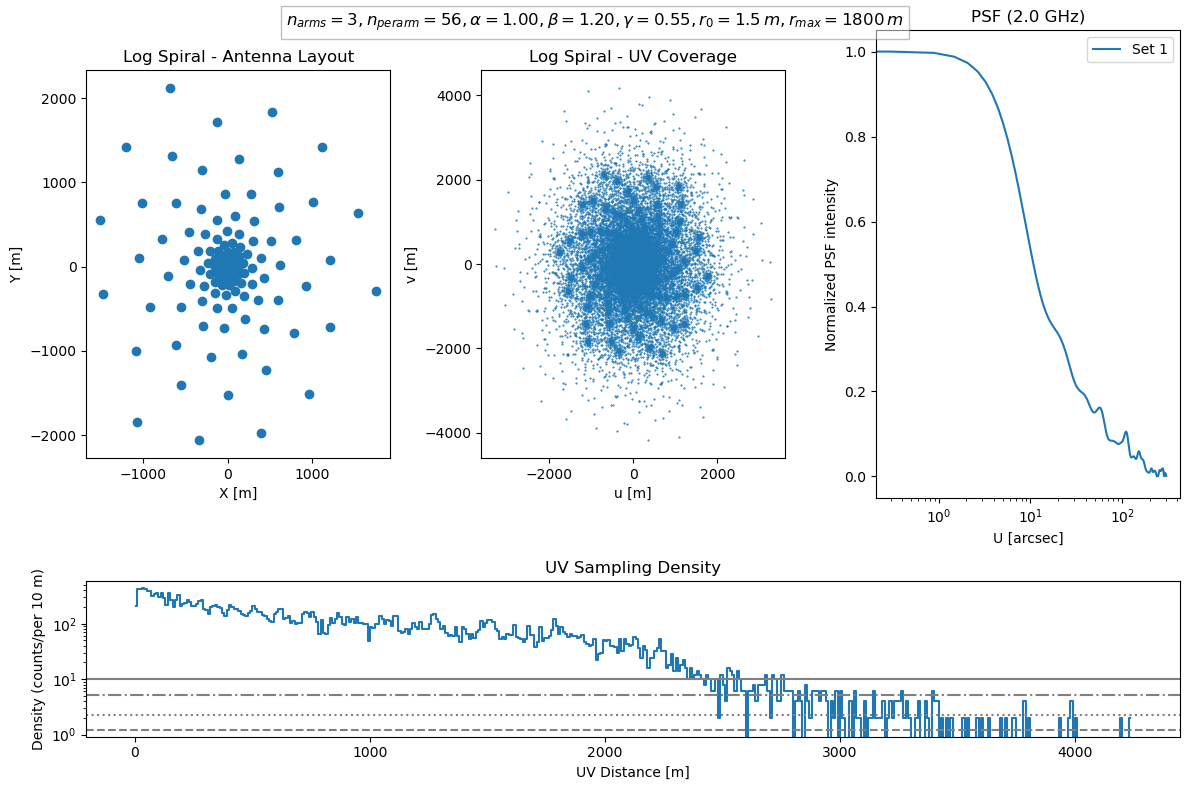

In [34]:
# %matplotlib notebook
%matplotlib inline
from importlib import reload

reload(fss)
# 72-element spiral with an optimized winding parameter k (corresponding to 1.5 turns), 
#     inner radius of 35 m, and outer radius of 2000 m

dsa_longitude = 
dsa_latitude = 39.54780

positions_kopt_72 = fss.generate_log_spiral_antenna_positions(antennas_per_arm=24, r0=35., r_max=2000., 
                                                              k=0.43, add_perturb=False, latitude)
positions_kopt_90 = fss.generate_log_spiral_antenna_positions(antennas_per_arm=30, r0=35., r_max=2000., 
                                                              k=0.43, add_perturb=False)


# Define log-spiral parameters
# SY's array configuration parameters
#array_config = {"n_arms": 3, "antennas_per_arm": 56, "alpha": 1.0, "gamma": 0.55, "r0": 1.5, "r_max": 1800, "n_turn": 2,
#                "latitude": 35}

array_config = {"n_arms": 3, "antennas_per_arm": 56, "alpha": 1.0, "beta": 1.2, "gamma": 0.55, "r0": 1.5, "r_max": 1800,
                "latitude": 39.5846, "clockwise":True}


positions_logspiral = fss.generate_log_spiral_antenna_positions(**array_config)
figname = (
    f"fig-fasr_Log_Spiral-{len(positions_logspiral)}-"
    f"n_arms={array_config['n_arms']}-antennas_per_arm={array_config['antennas_per_arm']}-"
    f"alpha={array_config['alpha']:.2f}-beta={array_config['beta']:.2f}-gamma={array_config['gamma']:.2f}-"
    f"r0={array_config['r0']:.1f}-r_max={array_config['r_max']:.0f}.jpg")
print(f'fig saved to {figname}')
figsubfolder = figname.rstrip('.jpg')
formatted_params = [
    rf"$n_{{\rm arms}}={array_config['n_arms']}$",
    rf"$\mbox{{antennas per arm}}={array_config['antennas_per_arm']}$",
    rf"$\alpha={array_config['alpha']:.2f}$",
    rf"$\beta={array_config['beta']:.2f}$",
    rf"$\gamma={array_config['gamma']:.2f}$",
    rf"$r_0={array_config['r0']:.1f}\,\mbox{{m}}$",
    rf"$r_{{\rm max}}={array_config['r_max']:.0f}\,\mbox{{m}}$"
]

# Create a full string that also includes the spiral equation.
array_config_str = (
    rf"$n_{{arms}}={array_config['n_arms']}, "
    rf"n_{{perarm}}={array_config['antennas_per_arm']}, "
    rf"\alpha={array_config['alpha']:.2f}, \beta={array_config['beta']:.2f}, \gamma={array_config['gamma']:.2f}, "
    rf"r_0={array_config['r0']:.1f}\,m, r_{{max}}={array_config['r_max']:.0f}\,m$"
)
fss.plot_all_panels(positions_logspiral, "Log Spiral", frequency=2, nyq_sample=nyq_sample, figname=figname,
                    array_config_str=array_config_str)
# fig = plt.gcf()
# ax = fig.axes[0]
# ax.set_xlim(-10,10)
# ax.set_ylim(-10,10)

Set 1: Beam (Natural) FWHM Major: 37.50 arcsec, Minor: 37.23"
Set 1: Beam (Uniform) FWHM Major: 3.99 arcsec, Minor: 3.98"
Set 1: Sidelobe RMS (Natural): 1.6%
Set 1: Sidelobe RMS (Uniform): 0.9%
(1024, 1024)
1024 0.24498674039480053 250.86642216427575
Set 2: Beam (Natural) FWHM Major: 47.62 arcsec, Minor: 47.04"
Set 2: Beam (Uniform) FWHM Major: 4.68 arcsec, Minor: 4.81"
Set 2: Sidelobe RMS (Natural): 3.3%
Set 2: Sidelobe RMS (Uniform): 1.5%
(1024, 1024)
1024 0.2294851554682573 234.99279919949547
'plot_all_panels' completed at 2026-01-28 06:58:48; runtime: 2.11 seconds


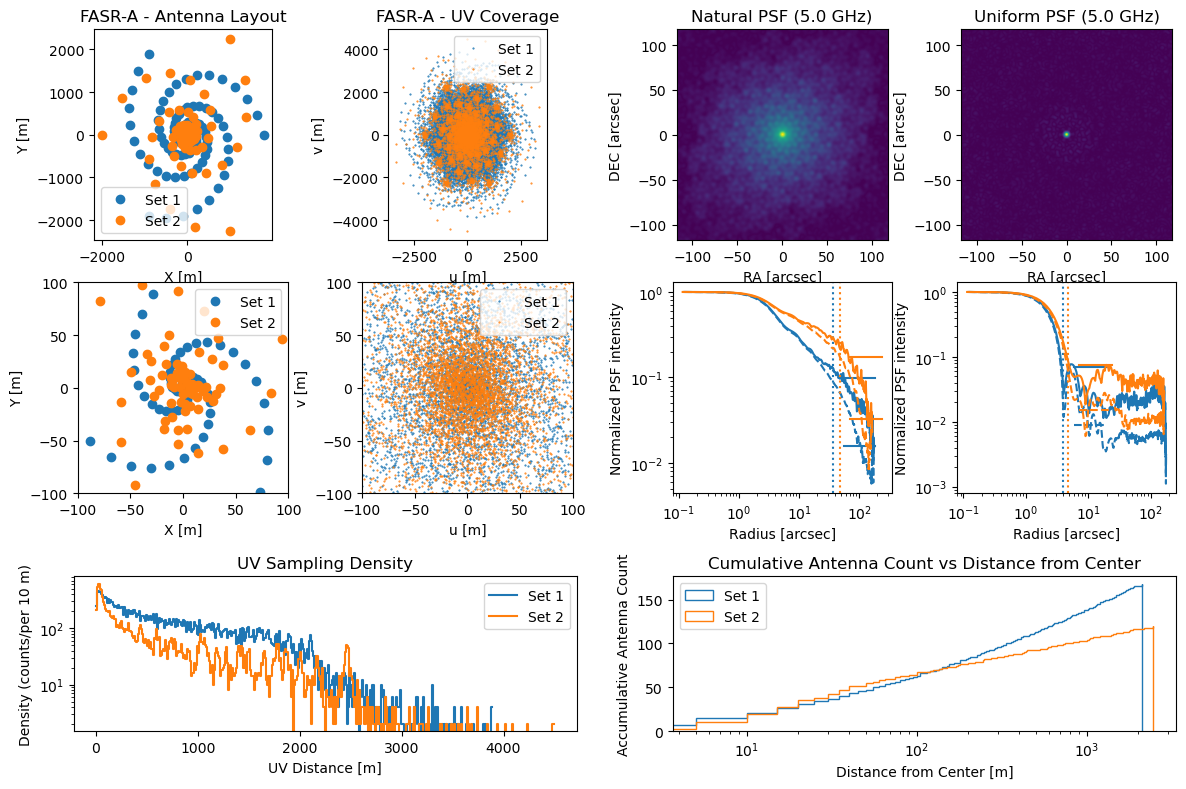

In [48]:
import importlib
importlib.reload(fss)
positions_sy, _ = fss.read_casa_antenna_list('fasr_Log_Spiral-168.cfg')
positions_hybrid, _ = fss.read_casa_antenna_list('fasr-a_random_spiral_hybrid_120.cfg')
fss.plot_all_panels([positions_sy, positions_hybrid], "FASR-A", plot_psf_fit=False, no_psf_legend=True)

'plot_all_panels' completed at 2026-01-23 13:29:49; runtime: 1.07 seconds


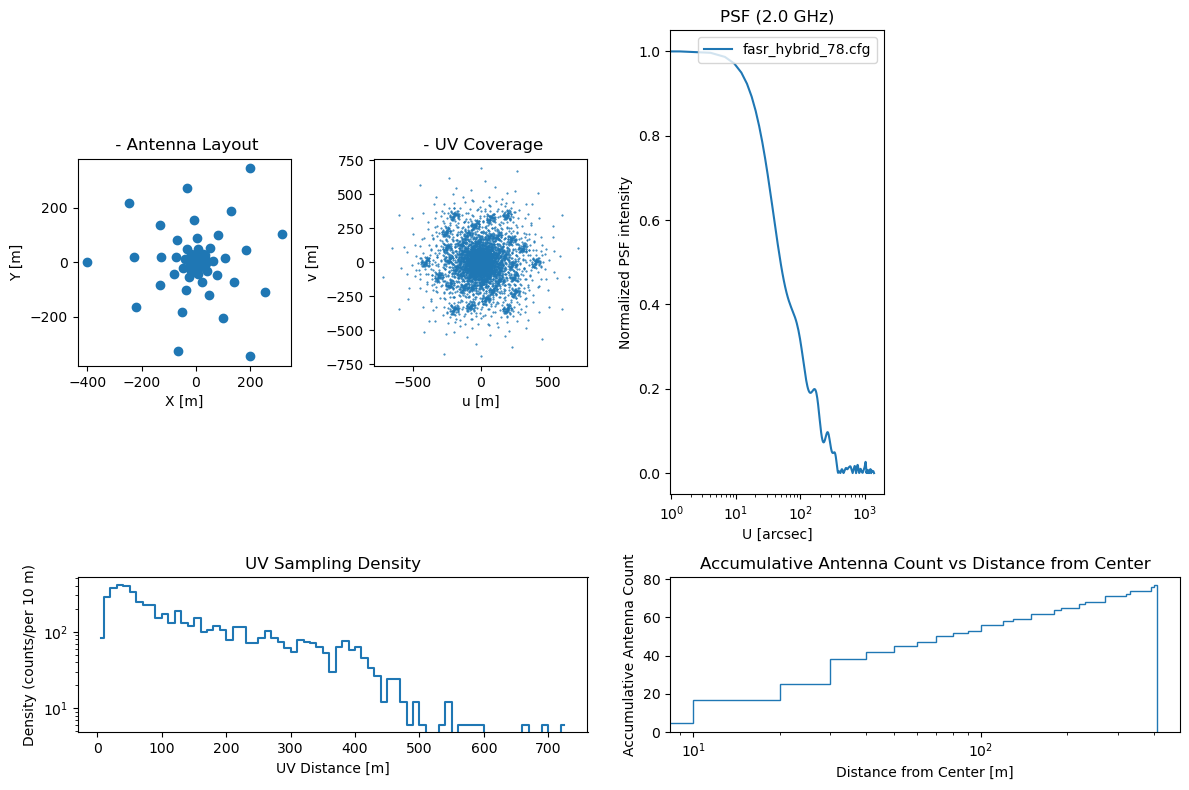

In [41]:
%matplotlib inline
from importlib import reload

reload(fss)
positions = fss.generate_hybrid_array()
fss.plot_all_panels([positions],
                    labels=["fasr_hybrid_78.cfg"], frequency=2, nyq_sample=None,
                    psf_mode='uprofile')

## Compare with Bin's optimized array configuration

'plot_all_panels' completed at 2026-01-22 18:50:05; runtime: 0.88 seconds


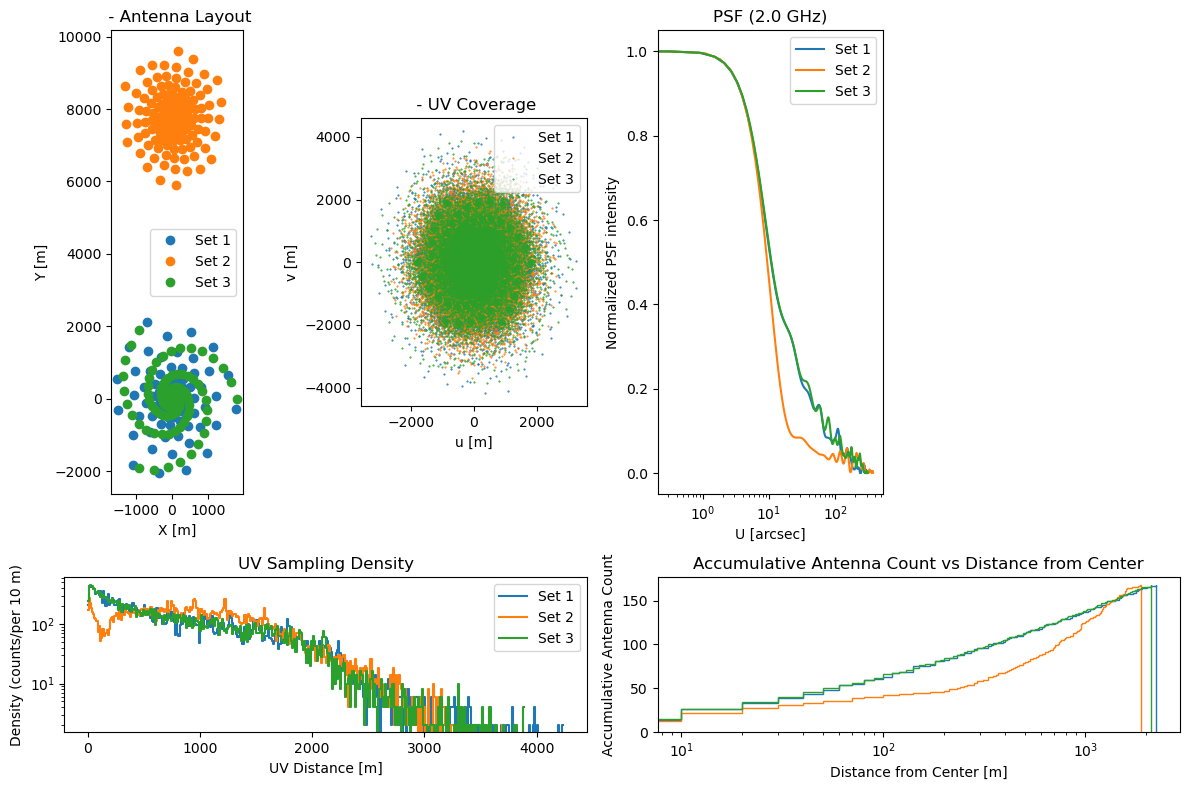

In [40]:
%matplotlib inline
from importlib import reload

reload(fss)
fss.plot_all_panels([positions_logspiral, positions_bc_opt, positions_sy],
                    labels=["fasr_Log_Spiral-168.cfg", 'fasr-a-spiral-168-opt.cfg'], frequency=2, nyq_sample=None,
                    psf_mode='uprofile')

## save the configuration

In [ ]:
# config_file = "fasr_antenna_list_Pseudo_Random.cfg"
# os.system('rm -rf ' + config_file)
# fss.write_casa_antenna_list(config_file, positions_pseudo)
config_file = f"fasr_Log_Spiral-{len(positions_logspiral)}.cfg"
os.system('rm -rf ' + config_file)
fss.write_casa_antenna_list(config_file, positions_logspiral)
# config_file = "fasr_logspiral_pseudo_random.cfg"
# os.system('rm -rf ' + config_file)
# write_casa_antenna_list(config_file, positions_comb)
# config_file = "fasr_antenna_list_Fib.cfg"
# os.system('rm -rf ' + config_file)
# write_casa_antenna_list(config_file, positions_fib)